In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/content/Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
print(df['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
# Plotting the distributions using Scatter Plot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

species = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [7]:
for j in features:
    fig = make_subplots(rows=1, cols=7, subplot_titles=species, x_title=j, y_title='Weight')
    for i, specie in enumerate(species, start=1):
        row = ((i - 1) // 7) + 1
        col = ((i - 1) % 7) + 1
        scatter_fig = px.scatter(df[df['Species'] == specie],
                                 x=j,
                                 y='Weight',
                                 title=specie,
                                 color='Weight',
                                 color_continuous_scale='emrld')
        fig.add_trace(scatter_fig['data'][0], row=row, col=col)

    fig.update_layout(height=300, width=1300)
    fig.show()

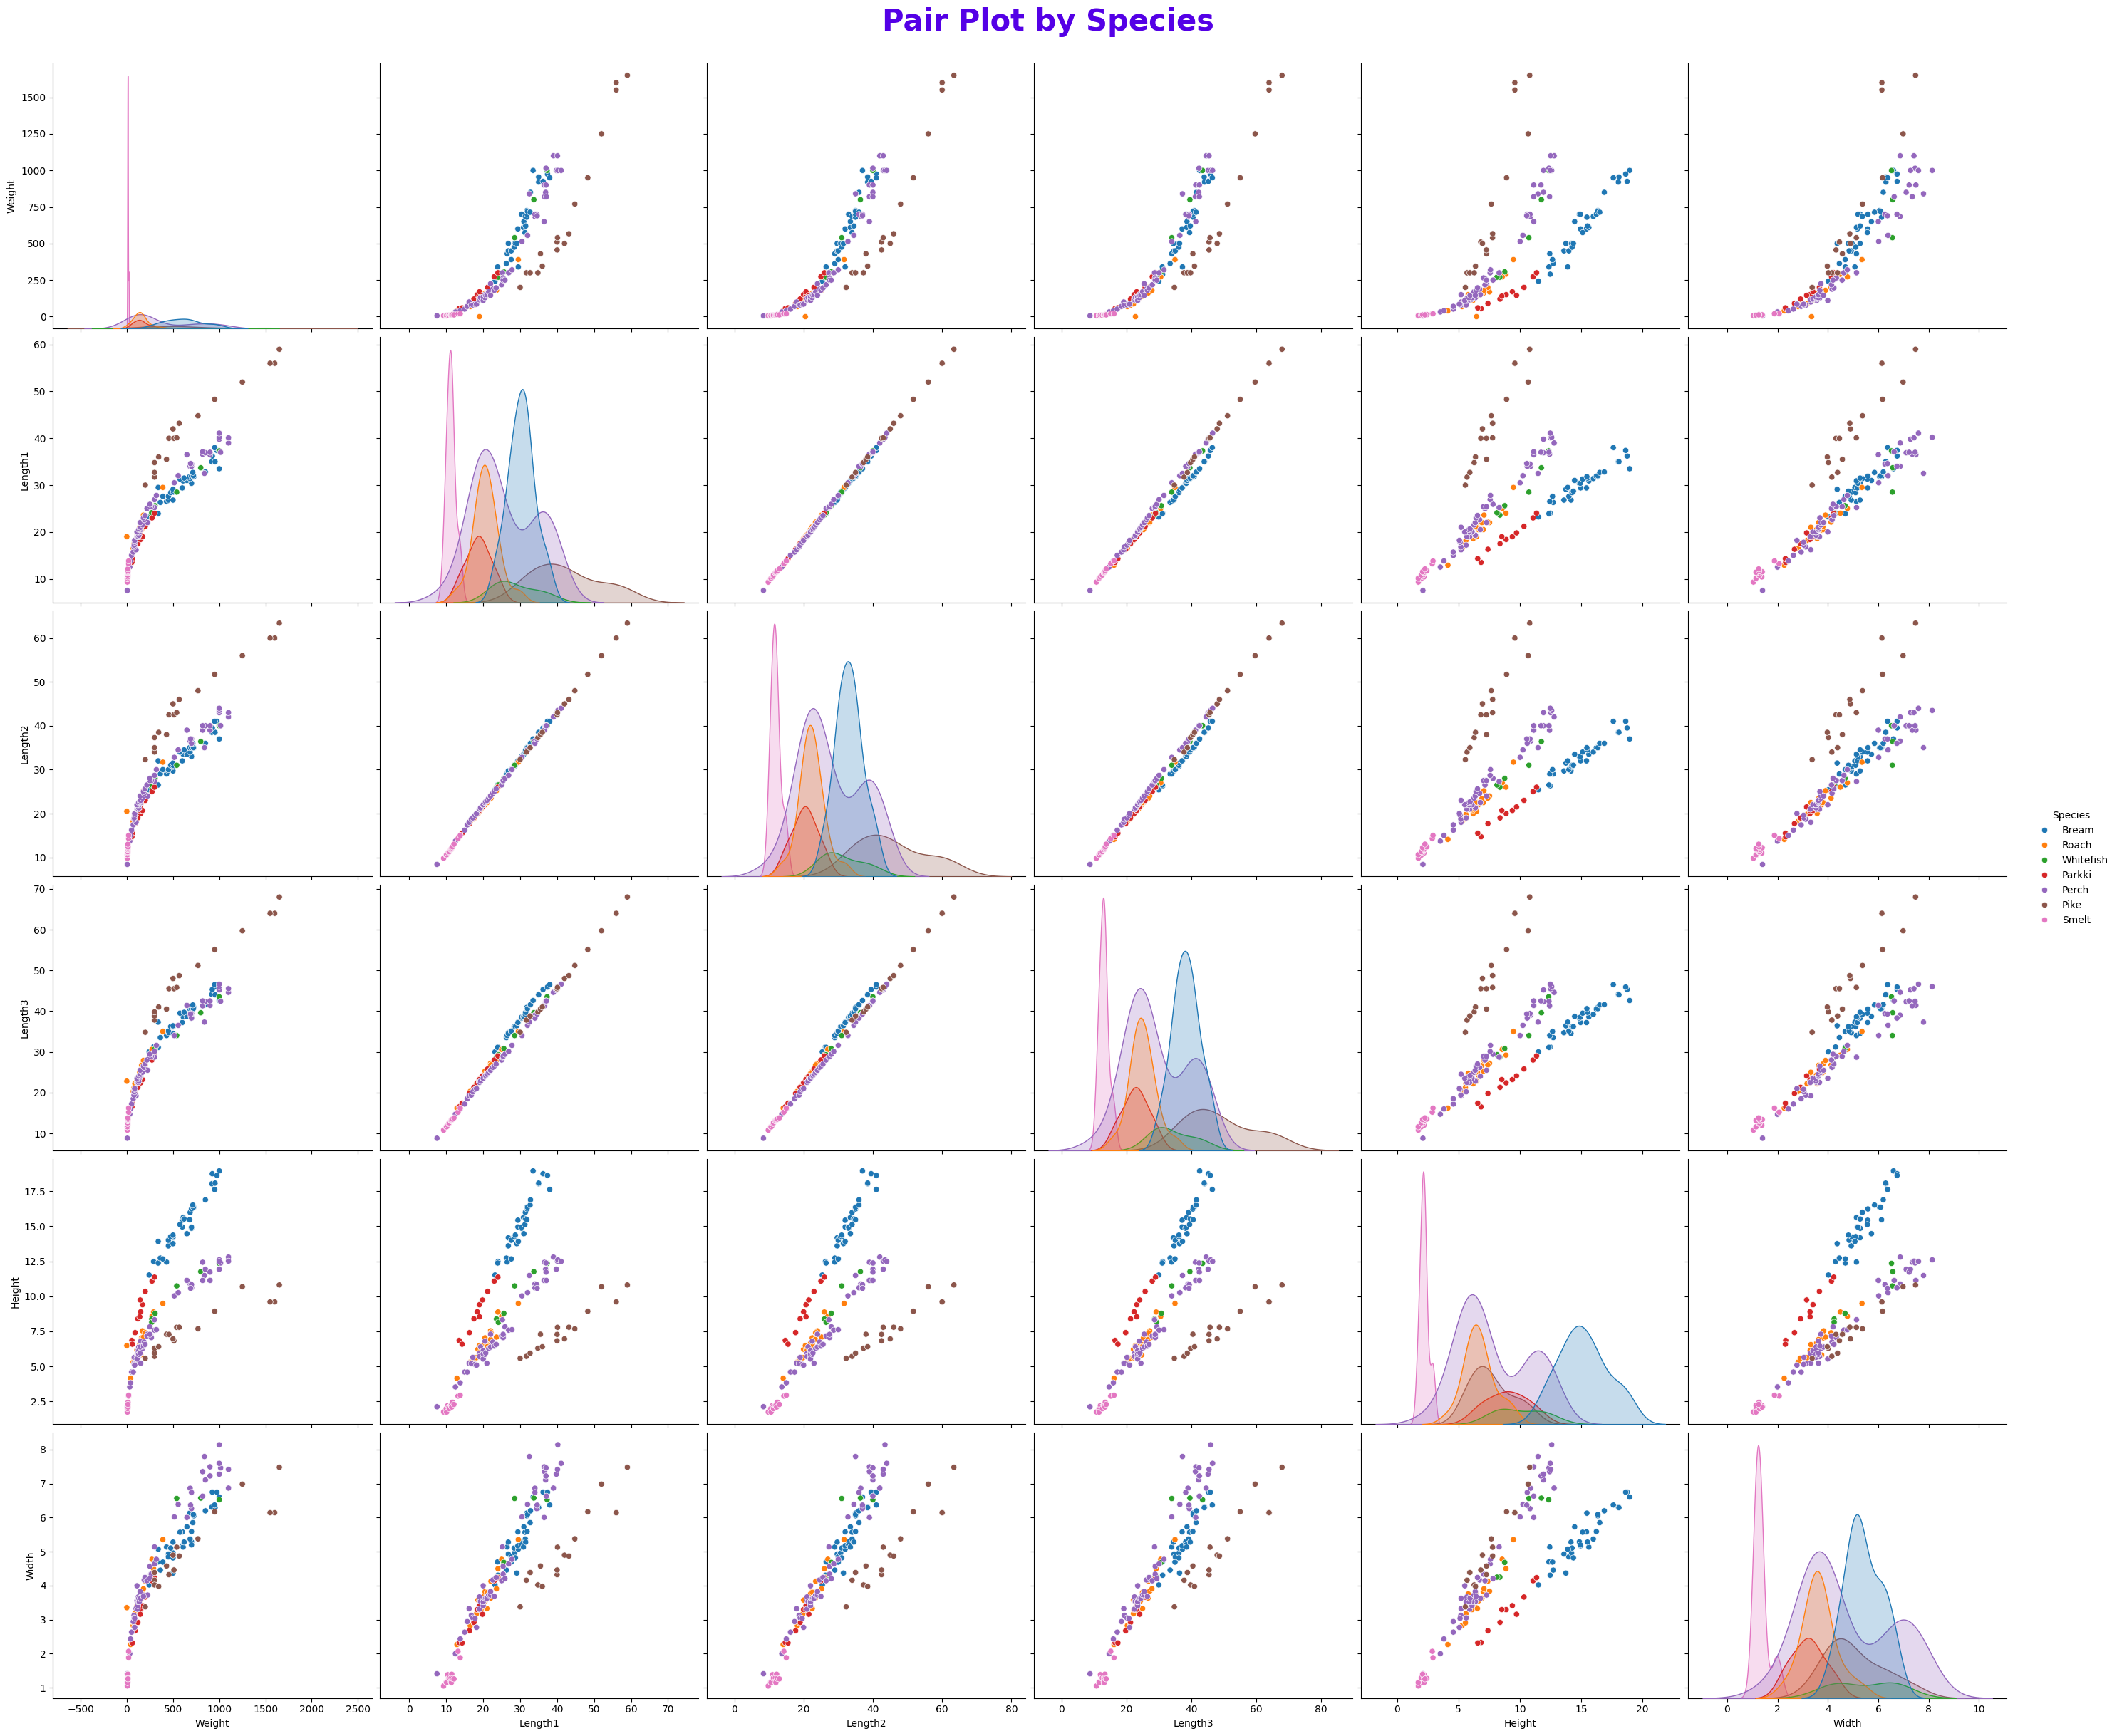

In [8]:
# Plotting the distributions using Pair Plot
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot = sns.pairplot(
    data=df,
    hue="Species",
    diag_kind="kde",  # Use kernel density estimates on diagonal plots
    height=4,
    aspect=1.2
)
pair_plot.fig.suptitle("Pair Plot by Species", y=1.02, fontsize=30, weight="bold", color='#5400e6')
plt.show()

In [9]:
# Seperating the target and the features
X = df.drop('Weight', axis=1)
y = df['Weight']

print(X[:5])
print(y[:5])

  Species  Length1  Length2  Length3   Height   Width
0   Bream     23.2     25.4     30.0  11.5200  4.0200
1   Bream     24.0     26.3     31.2  12.4800  4.3056
2   Bream     23.9     26.5     31.1  12.3778  4.6961
3   Bream     26.3     29.0     33.5  12.7300  4.4555
4   Bream     26.5     29.0     34.0  12.4440  5.1340
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


In [10]:
# Handling Categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Species'])], remainder='passthrough')
X_encoded = np.array(ct.fit_transform(X))
print(X_encoded[:5])

[[ 1.      0.      0.      0.      0.      0.      0.     23.2    25.4
  30.     11.52    4.02  ]
 [ 1.      0.      0.      0.      0.      0.      0.     24.     26.3
  31.2    12.48    4.3056]
 [ 1.      0.      0.      0.      0.      0.      0.     23.9    26.5
  31.1    12.3778  4.6961]
 [ 1.      0.      0.      0.      0.      0.      0.     26.3    29.
  33.5    12.73    4.4555]
 [ 1.      0.      0.      0.      0.      0.      0.     26.5    29.
  34.     12.444   5.134 ]]


In [11]:
# Splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 12)
(32, 12)
(127,)
(32,)


In [12]:
# Building and training the Polynomial Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
print(X_train_poly[:1])

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

[[  1.           0.           0.           1.           0.
    0.           0.           0.          15.          16.2
   17.2          4.5924       2.6316       0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           1.           0.           0.           0.
    0.          15.          16.2         17.2          4.5924
    2.6316       0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.         225.         243.         258.          68.886
   39.474      262.44       278.64        74.396

LinearRegression()

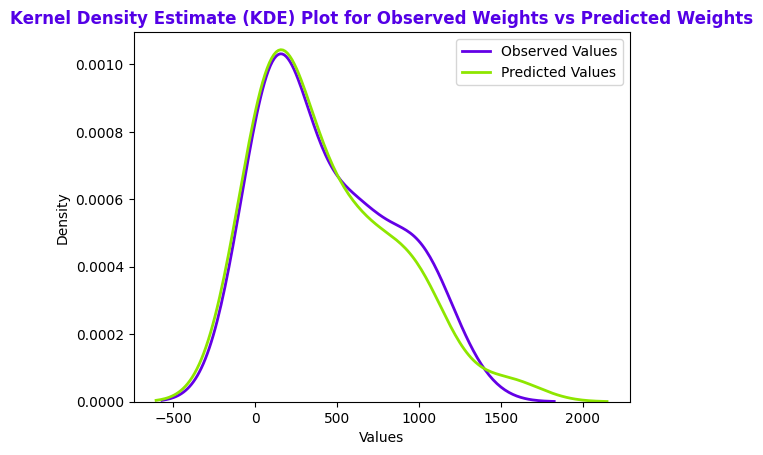

In [13]:
## Plotting kernel density estimate (KDE) plots for Observed Values vs Predicted Values
sns.kdeplot(x=y_test, linewidth=2, label='Observed Values', color='#6300e6')
sns.kdeplot(x=lin_reg.predict(poly_reg.fit_transform(X_test)), linewidth=2, color="#8ee600", label='Predicted Values')
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Plot for Observed Weights vs Predicted Weights", weight="bold", color="#5400e6")
plt.legend()
plt.show()